In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline  

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

from utils import *
from utils_plotting import plot_embedding

In [4]:
sns.set(style='ticks')

# color_palette = sns.color_palette('ticks', 2)
# sns.set_palette(color_palette)

# KiDS

In [5]:
kids_star = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.merged.cols.500k.csv', subset='star')

Data shape: (502439, 37)
Droping NANs: 403753 left
Removing limiting magnitudes: 109024 left
Removing errors bigger than 1: 109011 left
Removing SExtractor flags: 83419 left
Removing KiDS flags: 71929 left
Extracting star subset: 19017


In [6]:
kids_non_star = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.merged.cols.500k.csv', subset='non-star')

Data shape: (502439, 37)
Droping NANs: 403753 left
Removing limiting magnitudes: 109024 left
Removing errors bigger than 1: 109011 left
Removing SExtractor flags: 83419 left
Removing KiDS flags: 71929 left
Extracting non-star subset: 52912


In [7]:
kids_sdss_star = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv', sdss_cleaning=True, subset='star')

Data shape: (91317, 49)
Droping NANs: 89513 left
Removing limiting magnitudes: 74196 left
Removing errors bigger than 1: 74191 left
Removing SExtractor flags: 45491 left
Removing KiDS flags: 37036 left
Extracting star subset: 19114
Cleaning SDSS: 16282 left


In [8]:
kids_sdss_non_star = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv', sdss_cleaning=True, subset='non-star')

Data shape: (91317, 49)
Droping NANs: 89513 left
Removing limiting magnitudes: 74196 left
Removing errors bigger than 1: 74191 left
Removing SExtractor flags: 45491 left
Removing KiDS flags: 37036 left
Extracting non-star subset: 17922
Cleaning SDSS: 17539 left


In [9]:
kids = pd.concat([kids_star, kids_non_star])
kids_x_sdss = pd.concat([kids_sdss_star, kids_sdss_non_star])

# R cuts

In [7]:
for r_max in [22, 23, 24, 25, 26]:
    print(r_max, kids_star.loc[kids_star[MAG_GAAP_CALIB_R] < r_max].shape)

22 (11516, 47)
23 (14327, 47)
24 (17910, 47)
25 (19017, 47)
26 (19017, 47)


In [8]:
for r_max in [22, 23, 24, 25, 26]:
    print(r_max, kids_non_star.loc[kids_non_star[MAG_GAAP_CALIB_R] < r_max].shape)

22 (15818, 47)
23 (33915, 47)
24 (51350, 47)
25 (52912, 47)
26 (52912, 47)


# KiDS magnitudes

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


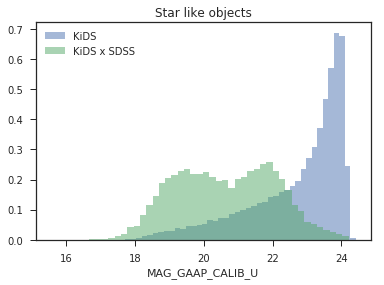

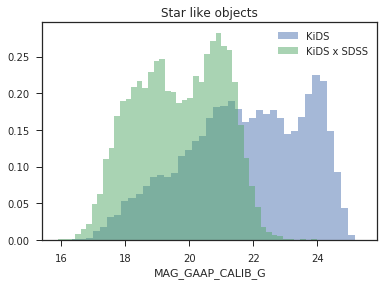

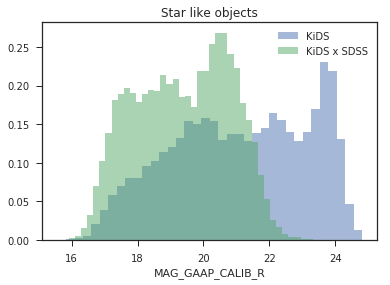

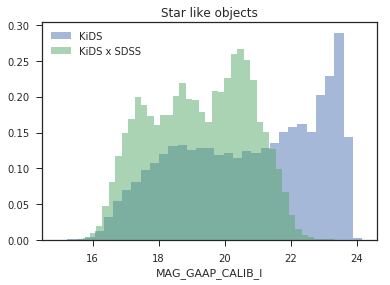

In [11]:
for b in BAND_CALIB_COLUMNS:
    plt.figure()
    sns.distplot(kids_star[b], label='KiDS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    sns.distplot(kids_sdss_star[b], label='KiDS x SDSS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    plt.title('Star like objects')
    plt.legend()

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


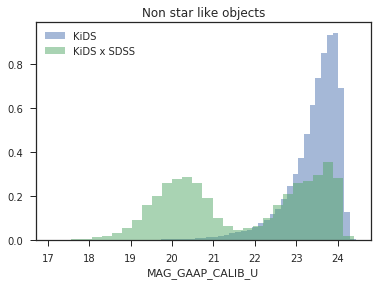

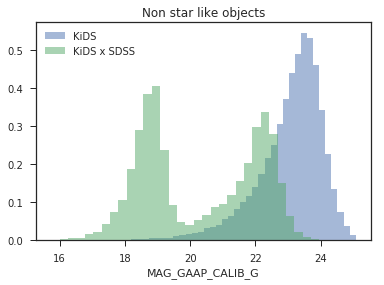

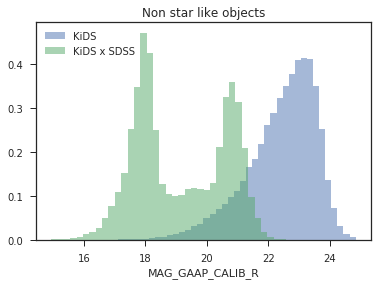

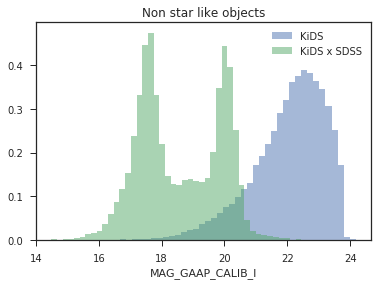

In [12]:
for b in BAND_CALIB_COLUMNS:
    plt.figure()
    sns.distplot(kids_non_star[b], label='KiDS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    sns.distplot(kids_sdss_non_star[b], label='KiDS x SDSS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    plt.title('Non star like objects')
    plt.legend()

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


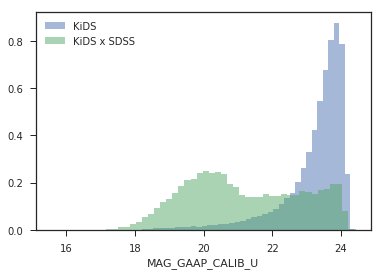

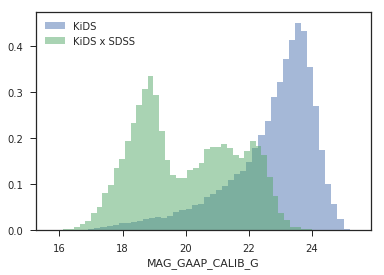

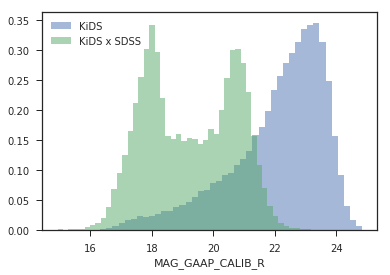

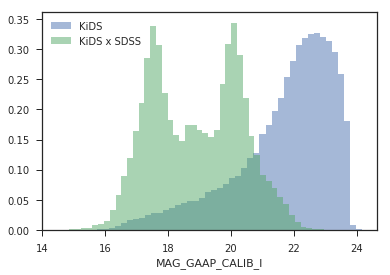

In [74]:
for b in BAND_CALIB_COLUMNS:
    plt.figure()
    sns.distplot(kids[b], label='KiDS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    sns.distplot(kids_x_sdss[b], label='KiDS x SDSS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
#     plt.title('Original data')
    plt.legend()

# KiDS Colors

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


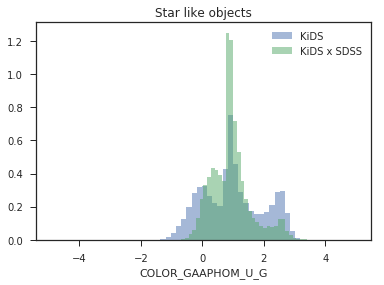

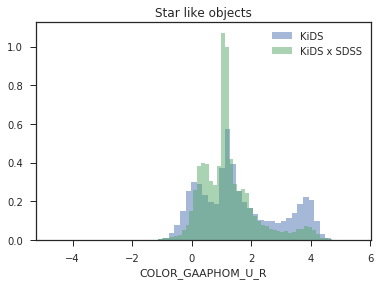

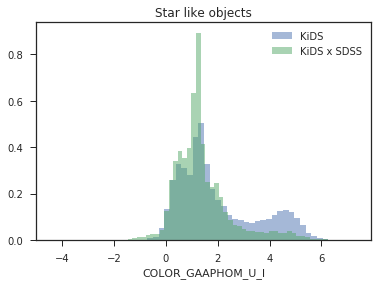

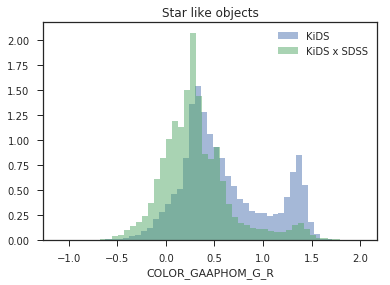

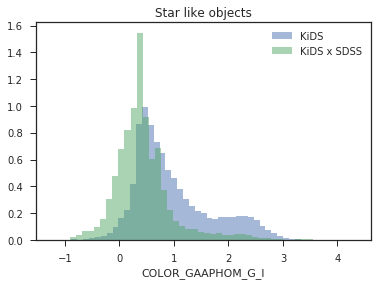

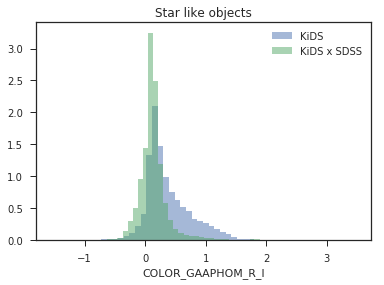

In [13]:
for c in COLOR_COLUMNS:
    plt.figure()
    sns.distplot(kids_star[c], label='KiDS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    sns.distplot(kids_sdss_star[c], label='KiDS x SDSS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    plt.title('Star like objects')
    plt.legend()

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


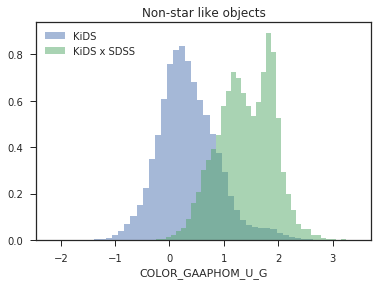

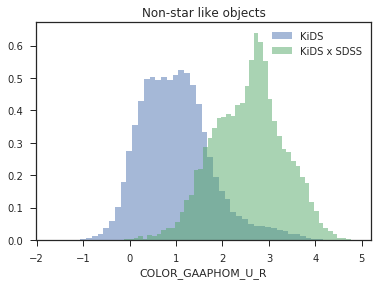

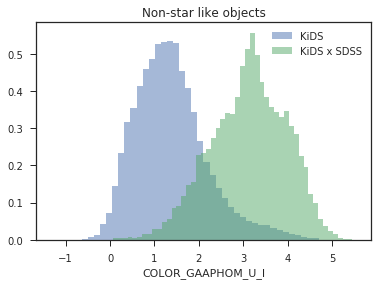

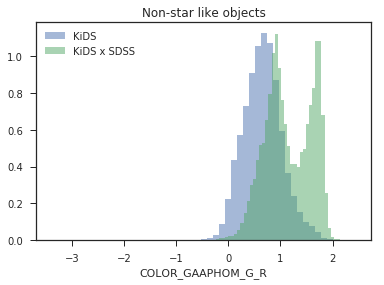

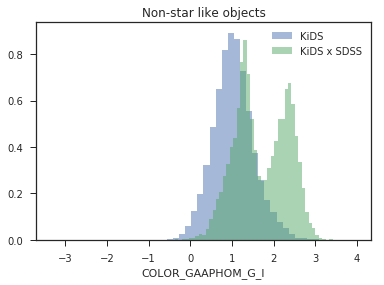

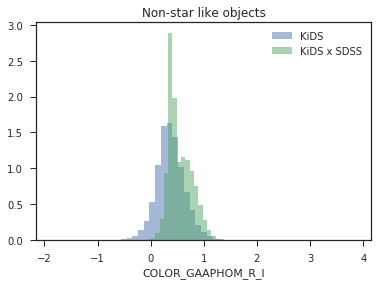

In [14]:
for c in COLOR_COLUMNS:
    plt.figure()
    sns.distplot(kids_non_star[c], label='KiDS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    sns.distplot(kids_sdss_non_star[c], label='KiDS x SDSS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    plt.title('Non-star like objects')
    plt.legend()

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


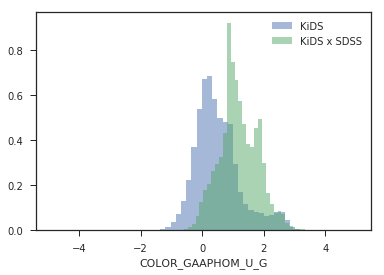

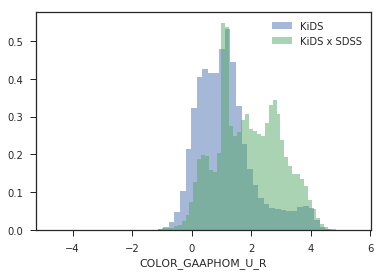

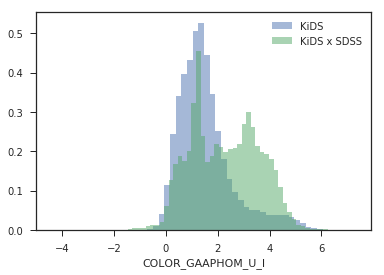

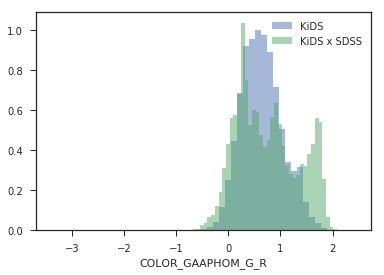

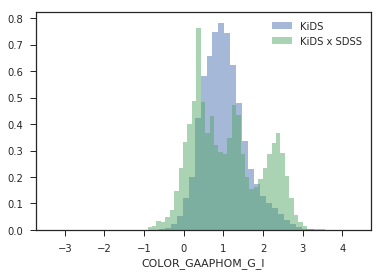

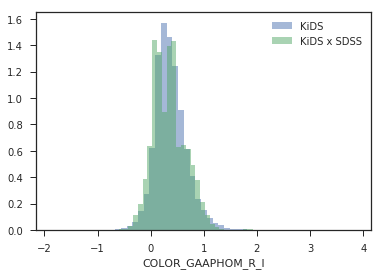

In [8]:
for c in COLOR_COLUMNS:
    plt.figure()
    sns.distplot(kids[c], label='KiDS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    sns.distplot(kids_x_sdss[c], label='KiDS x SDSS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    plt.legend()

# KiDS R < 22

In [11]:
kids_cut = kids.loc[kids[MAG_GAAP_CALIB_R] <= 22]
kids_x_sdss_cut = kids_x_sdss.loc[kids_x_sdss[MAG_GAAP_CALIB_R] <= 22]

In [12]:
print(kids.shape)
print(kids_cut.shape)

(71929, 47)
(27334, 47)


In [13]:
print(kids_x_sdss.shape)
print(kids_x_sdss_cut.shape)

(33821, 59)
(33587, 59)


In [14]:
print(np.unique(kids_x_sdss['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([17127,  6280, 10414]))


In [15]:
print(np.unique(kids_x_sdss_cut['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([17107,  6084, 10396]))


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


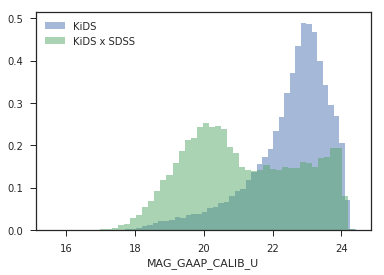

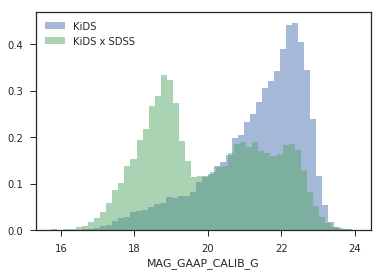

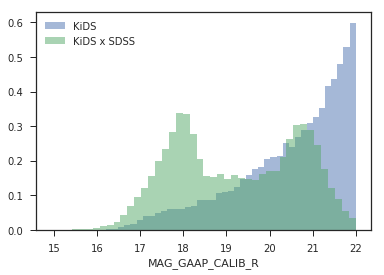

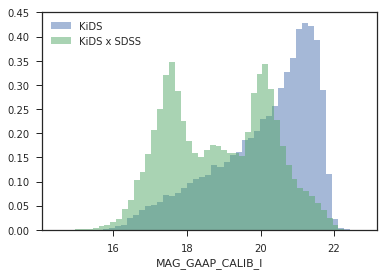

In [16]:
sns.set(style='ticks')
for c in BAND_CALIB_COLUMNS:
    plt.figure()
    sns.distplot(kids_cut[c], label='KiDS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    sns.distplot(kids_x_sdss_cut[c], label='KiDS x SDSS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    plt.legend()

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


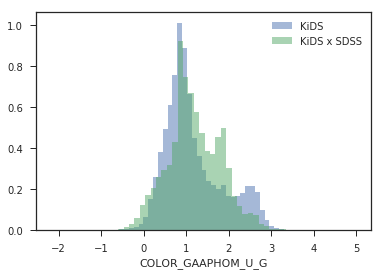

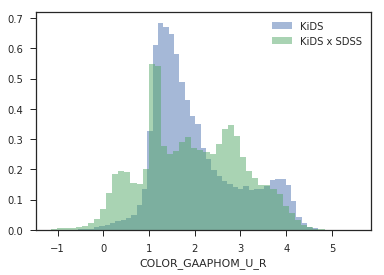

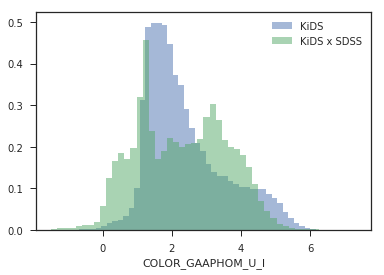

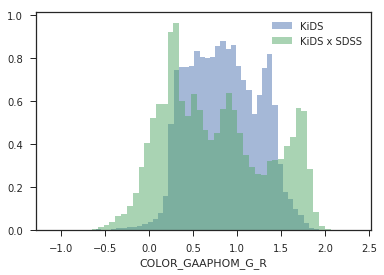

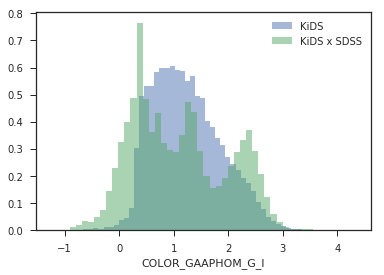

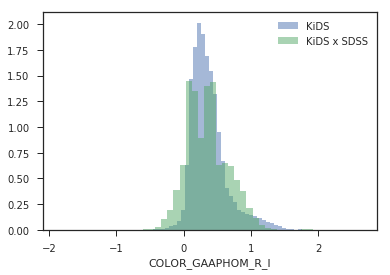

In [36]:
sns.set(style='ticks')
for c in COLOR_COLUMNS:
    plt.figure()
    sns.distplot(kids_cut[c], label='KiDS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    sns.distplot(kids_x_sdss_cut[c], label='KiDS x SDSS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    plt.legend()

# KiDS color cuts

In [37]:
kids_cut = kids.loc[kids[COLOR_GAAPHOM_U_G] > 0]
kids_x_sdss_cut = kids_x_sdss.loc[kids_x_sdss[COLOR_GAAPHOM_U_G] > 0]

In [38]:
print(kids.shape)
print(kids_cut.shape)

(71929, 47)
(54438, 47)


In [39]:
print(kids_x_sdss.shape)
print(kids_x_sdss_cut.shape)

(33821, 59)
(32998, 59)


In [40]:
print(np.unique(kids_x_sdss['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([17127,  6280, 10414]))


In [41]:
print(np.unique(kids_x_sdss_cut['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([17097,  5658, 10243]))


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


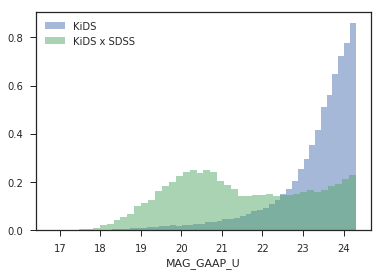

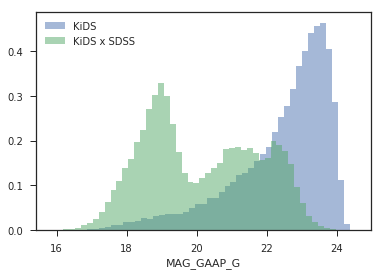

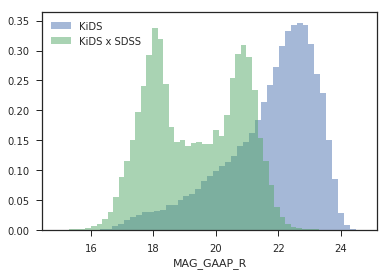

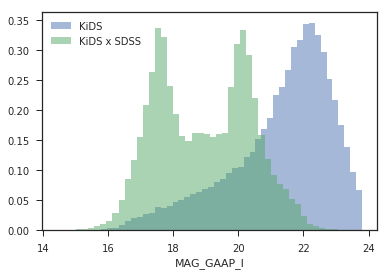

In [42]:
sns.set(style='ticks')
for c in BAND_COLUMNS:
    plt.figure()
    sns.distplot(kids_cut[c], label='KiDS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    sns.distplot(kids_x_sdss_cut[c], label='KiDS x SDSS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    plt.legend()

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


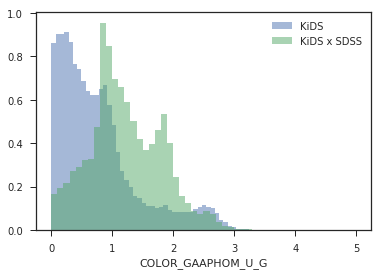

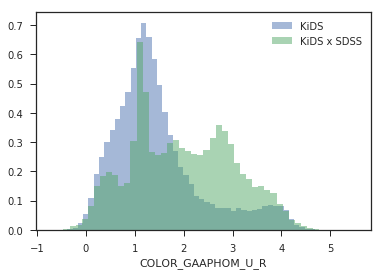

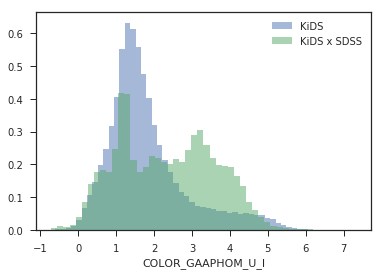

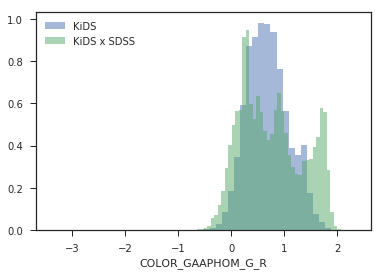

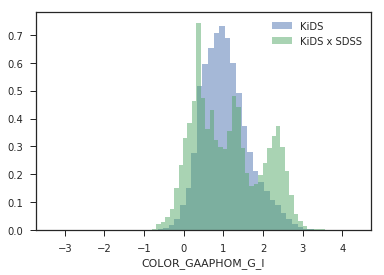

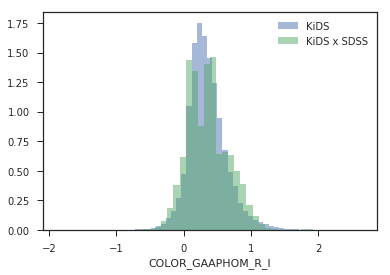

In [43]:
sns.set(style='ticks')
for c in COLOR_COLUMNS:
    plt.figure()
    sns.distplot(kids_cut[c], label='KiDS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    sns.distplot(kids_x_sdss_cut[c], label='KiDS x SDSS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    plt.legend()

# KiDS cut comparison with t-SNE

In [9]:
def add_cut_label(data):
    data['cut_label'] = 'left'
    data.loc[data[COLOR_GAAPHOM_U_G] < 0, 'cut_label'] = 'u-g cut'
    data.loc[data[MAG_GAAP_CALIB_R] > 22, 'cut_label'] = 'r cut'
    data.loc[(data[MAG_GAAP_CALIB_R] > 22) & (data[COLOR_GAAPHOM_U_G] < 0), 'cut_label'] = 'both cuts'
    return data

In [10]:
kids_merged = kids_x_sdss.append(kids.loc[~kids['ID'].isin(kids_x_sdss['ID'])])

In [11]:
kids_merged = add_cut_label(kids_merged)

In [12]:
kids_merged['is_in_SDSS'] = kids_merged['ID'].isin(kids_x_sdss['ID'])

In [13]:
kids_sampled = kids_merged.sample(20000, random_state=1467)

## All features

In [14]:
kids_features = MinMaxScaler().fit_transform(kids_sampled[FEATURES['all']])

In [15]:
kids_embedded = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000,
                     n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=1,
                     random_state=4680, method='barnes_hut', angle=0.5).fit_transform(kids_features)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.013s...
[t-SNE] Computed neighbors for 20000 samples in 1.200s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sam

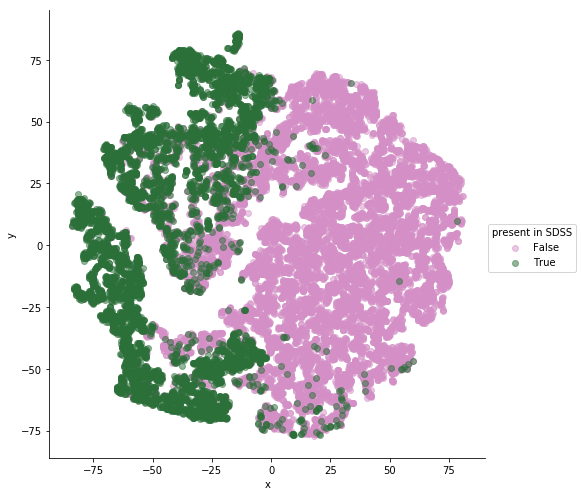

In [32]:
plot_embedding(kids_embedded, kids_sampled['is_in_SDSS'], label='present in SDSS')

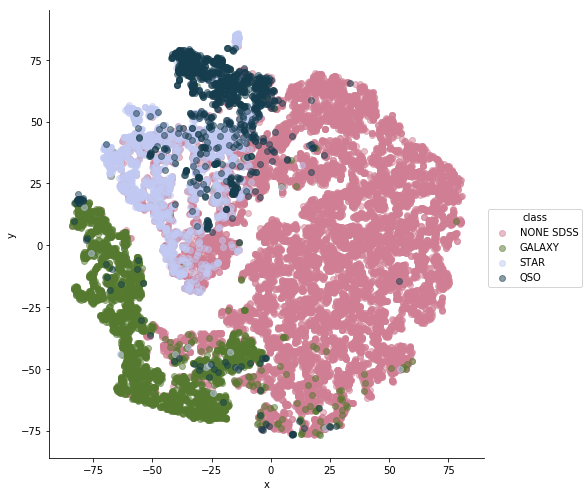

In [38]:
plot_embedding(kids_embedded, kids_sampled['CLASS'].fillna(value='NONE SDSS'))

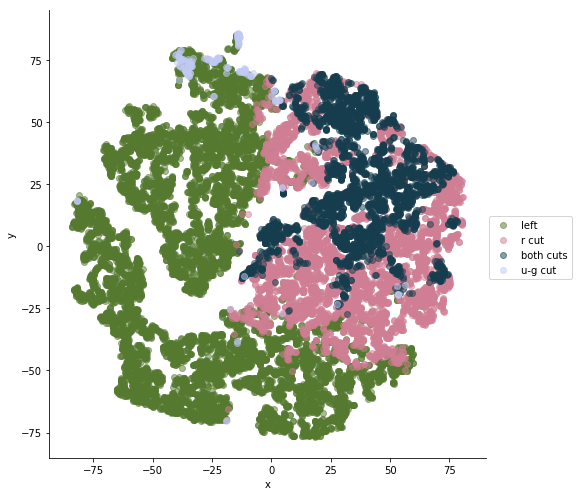

In [46]:
plot_embedding(kids_embedded, kids_sampled['cut_label'], label='')

## No magnitudes: colors, ratios, class star

In [52]:
kids_features = MinMaxScaler().fit_transform(kids_sampled[FEATURES['no-mags']])

In [53]:
kids_embedded = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000,
                     n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=1,
                     random_state=4680, method='barnes_hut', angle=0.5).fit_transform(kids_features)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.010s...
[t-SNE] Computed neighbors for 20000 samples in 0.814s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sam

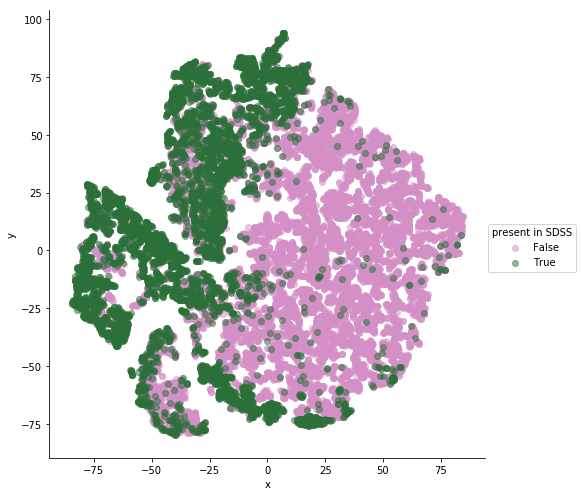

In [54]:
plot_embedding(kids_embedded, kids_sampled['is_in_SDSS'], label='present in SDSS')

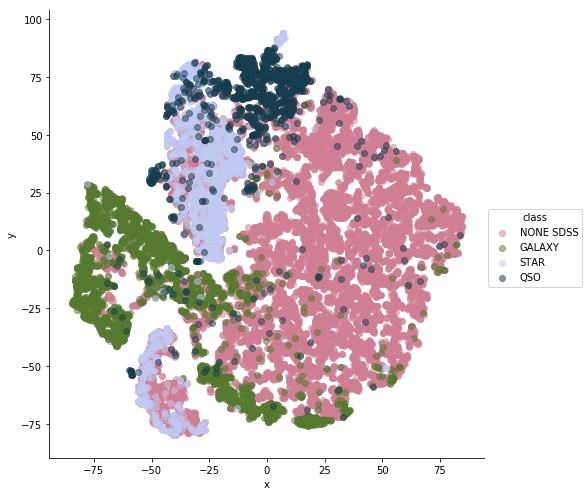

In [55]:
plot_embedding(kids_embedded, kids_sampled['CLASS'].fillna(value='NONE SDSS'))

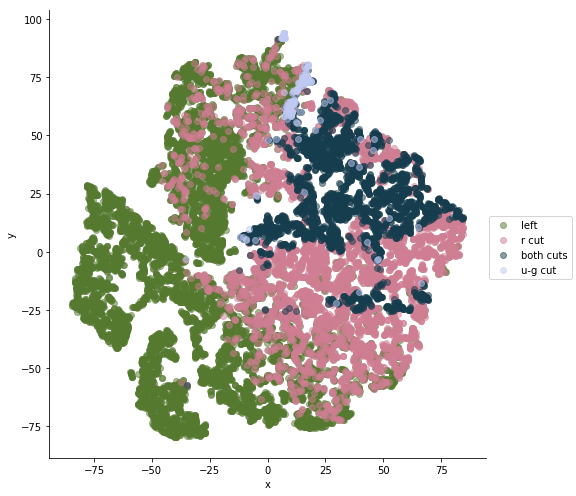

In [56]:
plot_embedding(kids_embedded, kids_sampled['cut_label'], label='')

## KiDS colors + magnitudes

In [58]:
kids_features = MinMaxScaler().fit_transform(kids_sampled[FEATURES['all']])

In [59]:
kids_embedded = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000,
                     n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=1,
                     random_state=4680, method='barnes_hut', angle=0.5).fit_transform(kids_features)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.010s...
[t-SNE] Computed neighbors for 20000 samples in 0.854s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sam

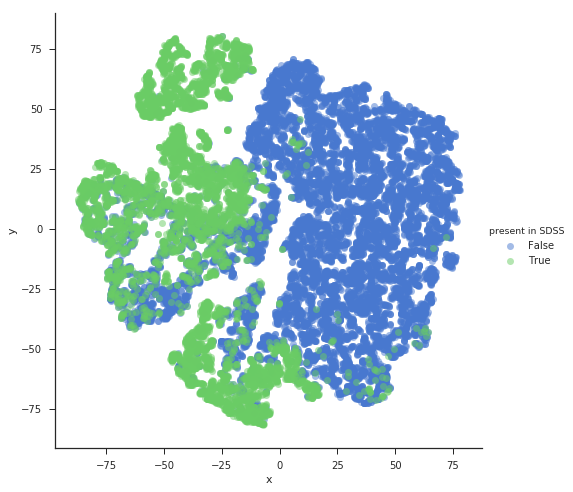

In [60]:
plot_embedding(kids_embedded, kids_sampled['is_in_SDSS'], label_name='present in SDSS')

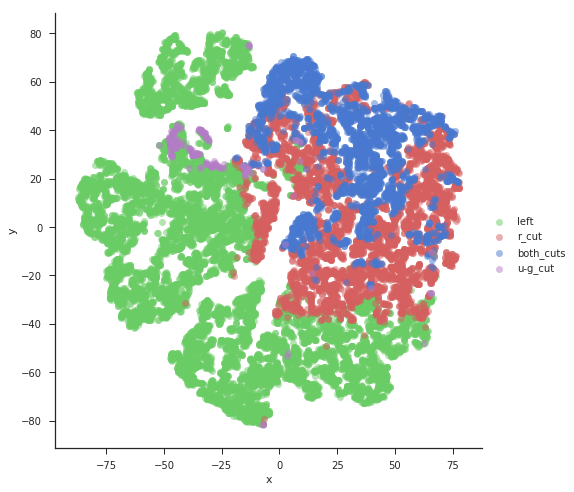

In [61]:
plot_embedding(kids_embedded, kids_sampled['cut_label'], label_name='')

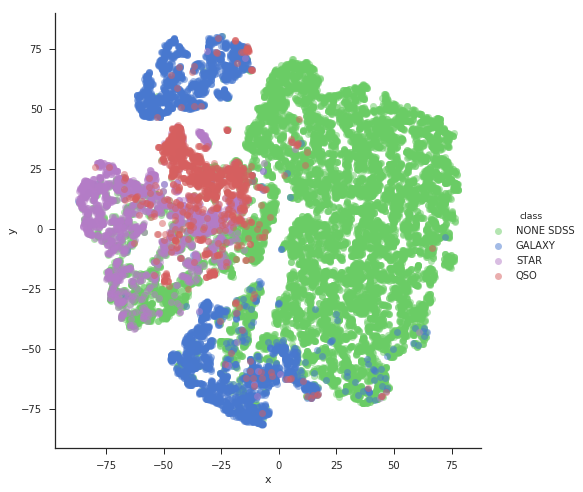

In [62]:
plot_embedding(kids_embedded, kids_sampled['CLASS'].fillna(value='NONE SDSS'))

## KiDS colors

In [63]:
kids_colors = MinMaxScaler().fit_transform(kids_sampled[FEATURES['colors-cstar']])

In [64]:
kids_colors_embedded = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000,
                            n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=1,
                            random_state=4680, method='barnes_hut', angle=0.5).fit_transform(kids_colors)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.008s...
[t-SNE] Computed neighbors for 20000 samples in 0.536s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sam

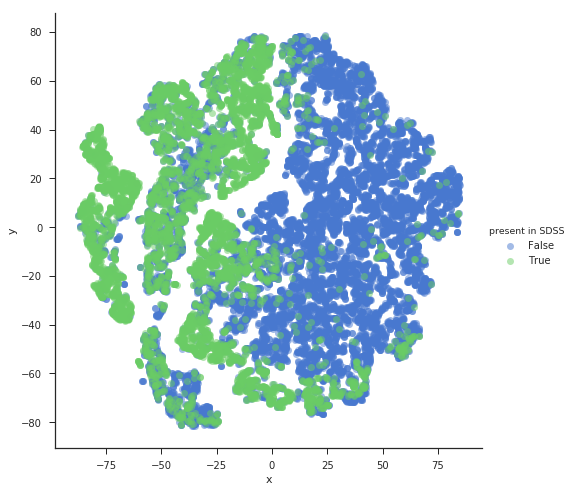

In [65]:
plot_embedding(kids_colors_embedded, kids_sampled['is_in_SDSS'], label_name='present in SDSS')

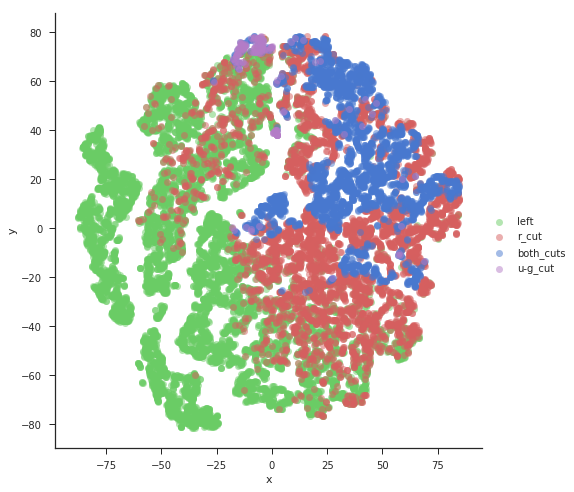

In [66]:
plot_embedding(kids_colors_embedded, kids_sampled['cut_label'], label_name='')

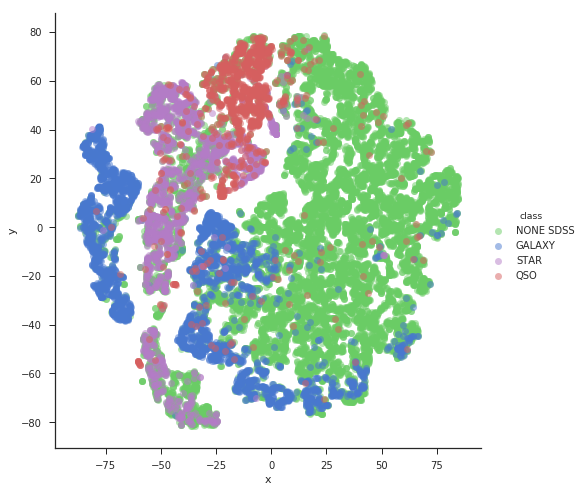

In [67]:
plot_embedding(kids_colors_embedded, kids_sampled['CLASS'].fillna(value='NONE SDSS'))

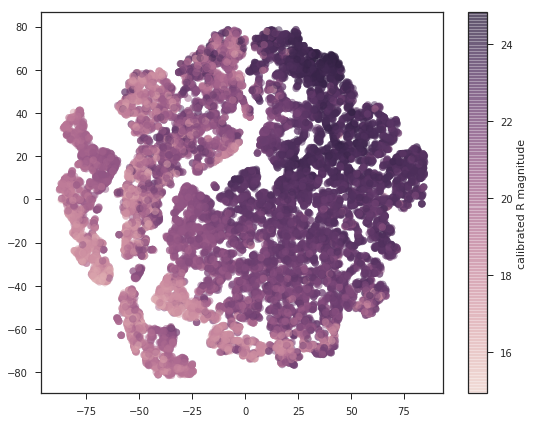

In [69]:
plot_embedding(kids_colors_embedded, kids_sampled[MAG_GAAP_CALIB_R], label='calibrated R magnitude', is_continuous=True)

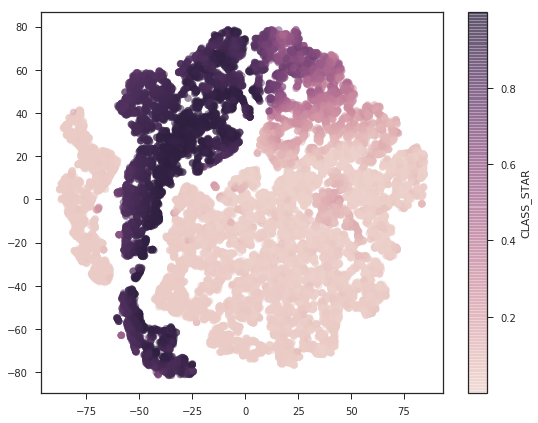

In [70]:
plot_embedding(kids_colors_embedded, kids_sampled['CLASS_STAR'], label='CLASS_STAR', is_continuous=True)

# KiDS STAR

In [62]:
kids_star = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.STAR.cols.csv')

Data shape: (4514831, 37)
Droping NANs: 4053246 left
Removing limiting magnitudes: 2286021 left
Removing errors bigger than 1: 2285941 left
Removing SExtractor flags: 1690689 left
Removing ima-flags: 1402259 left


In [64]:
kids_star_x_sdss = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.STAR.x.SDSS.DR14.cols.csv', sdss_cleaning=True)

Data shape: (30940, 42)
Droping NANs: 30679 left
Removing limiting magnitudes: 29514 left
Removing errors bigger than 1: 29514 left
Removing SExtractor flags: 23446 left
Removing ima-flags: 18829 left
Cleaning SDSS: 16056 left


## R cut

In [65]:
kids_star_cut = kids_star.loc[kids_star[MAG_GAAP_R] < 22]
kids_star_x_sdss_cut = kids_star_x_sdss.loc[kids_star_x_sdss[MAG_GAAP_R] < 22]

In [66]:
print(kids_star.shape)
print(kids_star_cut.shape)

(1402259, 41)
(1095613, 41)


In [67]:
print(kids_star_x_sdss.shape)
print(kids_star_x_sdss_cut.shape)

(16056, 46)
(15793, 46)


In [68]:
print(np.unique(kids_star_x_sdss['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  102,  5680, 10274]))


In [69]:
print(np.unique(kids_star_x_sdss_cut['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  101,  5455, 10237]))


## Color cut

In [70]:
kids_star_cut = kids_star.loc[kids_star[COLOR_GAAPHOM_U_G] > 0]
kids_star_x_sdss_cut = kids_star_x_sdss.loc[kids_star_x_sdss[COLOR_GAAPHOM_U_G] > 0]

In [71]:
print(kids_star.shape)
print(kids_star_cut.shape)

(1402259, 41)
(1342732, 41)


In [72]:
print(kids_star_x_sdss.shape)
print(kids_star_x_sdss_cut.shape)

(16056, 46)
(15287, 46)


In [73]:
print(np.unique(kids_star_x_sdss['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  102,  5680, 10274]))


In [74]:
print(np.unique(kids_star_x_sdss_cut['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([   96,  5088, 10103]))


# KiDS GAIA

In [75]:
kids_gaia = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.GAIA.cols.csv')

Data shape: (1525462, 37)
Droping NANs: 1515124 left
Removing limiting magnitudes: 1359837 left
Removing errors bigger than 1: 1359825 left
Removing SExtractor flags: 913195 left
Removing ima-flags: 722284 left


In [76]:
kids_gaia_x_sdss = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.GAIA.x.SDSS.DR14.cols.csv', sdss_cleaning=True)

Data shape: (29297, 42)
Droping NANs: 29210 left
Removing limiting magnitudes: 28825 left
Removing errors bigger than 1: 28825 left
Removing SExtractor flags: 19248 left
Removing ima-flags: 15009 left
Cleaning SDSS: 14438 left


## R cut

In [77]:
kids_gaia_cut = kids_gaia.loc[kids_gaia[MAG_GAAP_R] < 22]
kids_gaia_x_sdss_cut = kids_gaia_x_sdss.loc[kids_gaia_x_sdss[MAG_GAAP_R] < 22]

In [78]:
print(kids_gaia.shape)
print(kids_gaia_cut.shape)

(722284, 41)
(722277, 41)


In [79]:
print(kids_gaia_x_sdss.shape)
print(kids_gaia_x_sdss_cut.shape)

(14438, 46)
(14437, 46)


In [80]:
print(np.unique(kids_gaia_x_sdss['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([3024, 3547, 7867]))


In [81]:
print(np.unique(kids_gaia_x_sdss_cut['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([3024, 3547, 7866]))


## Color cut

In [82]:
kids_gaia_cut = kids_gaia.loc[kids_gaia[COLOR_GAAPHOM_U_G] > 0]
kids_gaia_x_sdss_cut = kids_gaia_x_sdss.loc[kids_gaia_x_sdss[COLOR_GAAPHOM_U_G] > 0]

In [83]:
print(kids_gaia.shape)
print(kids_gaia_cut.shape)

(722284, 41)
(718686, 41)


In [84]:
print(kids_gaia_x_sdss.shape)
print(kids_gaia_x_sdss_cut.shape)

(14438, 46)
(13877, 46)


In [85]:
print(np.unique(kids_gaia_x_sdss['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([3024, 3547, 7867]))


In [86]:
print(np.unique(kids_gaia_x_sdss_cut['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([3024, 3062, 7791]))
